In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # For creating custom legend markers

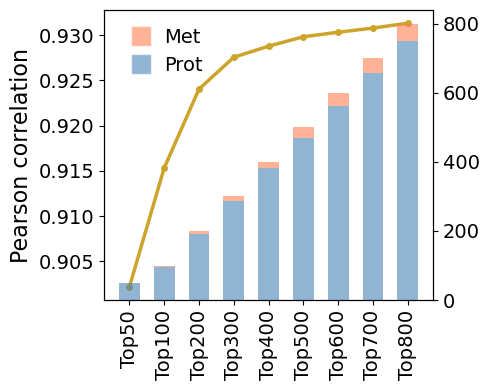

In [ ]:
# Read CSV file containing feature selection results
# Columns should include: Screen method names, Pearson correlations, and feature counts for Proteomics and Metabolomics
df = pd.read_csv('../data/1.Top800+count.csv')

# Ensure 'Screen' column is treated as string (categorical) data
df['Screen'] = df['Screen'].astype(str)

# Set width for the bars in the bar chart
bar_width = 0.6

# Initialize figure with specific size (width, height in inches)
# Increased width to accommodate rotated x-axis labels
plt.figure(figsize=(5, 4))

# Create line plot for Pearson correlation values
# Using circular markers (o) with size 4, gold color (#CCA42C), and linewidth 2.5
plt.plot(df['Screen'], df['SR-Pearson'], marker='o', markersize=4, label='Pearson Correlation', color='#CCA42C', linewidth=2.5)

# Configure left y-axis (for Pearson correlation)
plt.ylabel('Pearson correlation', color='black', fontsize=16)
plt.tick_params(axis='y', labelcolor='black', labelsize=14)

# Configure x-axis
plt.tick_params(axis='x', labelcolor='black', labelsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels 90 degrees for readability

# Create second y-axis (right side) for feature counts
ax2 = plt.twinx()

# Create stacked bar chart showing feature counts:
# 1. Proteomics features (bottom, steel blue color #4682B4)
# 2. Metabolomics features (top, coral color #FF7F50)
# Both with 60% opacity (alpha=0.6)
ax2.bar(df['Screen'], df['Prot'], width=bar_width, label='Proteomics', color='#4682B4', alpha=0.6)
ax2.bar(df['Screen'], df['Met'], width=bar_width, bottom=df['Prot'], label='Metabolomics', color='#FF7F50', alpha=0.6)

# Configure right y-axis
ax2.tick_params(axis='y', labelcolor='black')

plt.tick_params(axis='y', labelsize=14)

# Create custom legend elements for the stacked bars:
# Square markers (s) with specified colors and transparency
legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#FF7F50', markersize=14, label='Met', alpha=0.6),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#4682B4', markersize=14, label='Prot', alpha=0.6)
]

# Add legend to plot:
# - Using custom elements
# - No frame (frameon=False)
# - Font size 14
# - Positioned in upper left
# - Adjusted marker spacing
plt.legend(handles=legend_elements, frameon=False, fontsize=14, loc='upper left', handlelength=2, handletextpad=0.2)

# Automatically adjust subplot parameters to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()